In [64]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [66]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [68]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [70]:
y_train.shape

(50000, 1)

In [72]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [74]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [76]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

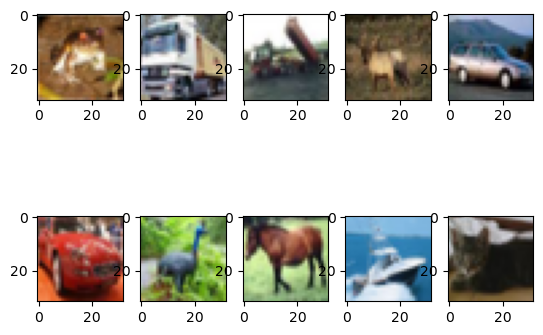

In [8]:
photos = X_train[:10]
for i , img in enumerate(photos):
    plt.subplot(2,5,i+1)
    plt.imshow(img)

In [78]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

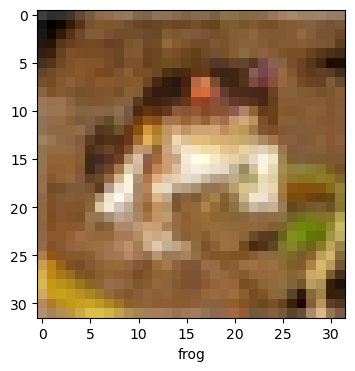

In [80]:
plot_photos(X_train,y_train,0)

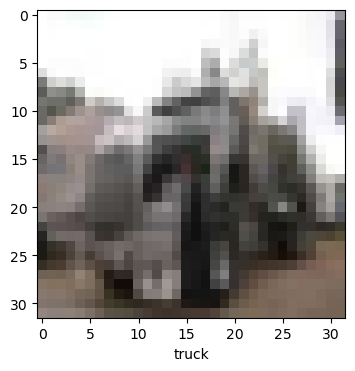

In [82]:
plot_photos(X_train,y_train,122)

In [84]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h1>Let's first try building using simple ANN</h1>

In [87]:

ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation ='relu'),
    layers.Dense(1000,activation ='relu'),
    layers.Dense(10,activation ='sigmoid')
    
    
    
    
])
ann.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])
ann.fit(X_train,y_train,epochs = 5)

C:\Users\Laraib\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.3040 - loss: 1.9377
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.4211 - loss: 1.6468
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.4505 - loss: 1.5569
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.4763 - loss: 1.4908
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.4922 - loss: 1.4404


In [89]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4847 - loss: 1.4489


[1.4552927017211914, 0.48330000042915344]

In [91]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np


In [93]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("classification report \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
classification report 
               precision    recall  f1-score   support

           0       0.50      0.59      0.54      1000
           1       0.55      0.67      0.60      1000
           2       0.49      0.15      0.23      1000
           3       0.37      0.26      0.30      1000
           4       0.42      0.44      0.43      1000
           5       0.43      0.33      0.37      1000
           6       0.54      0.52      0.53      1000
           7       0.42      0.65      0.51      1000
           8       0.58      0.67      0.62      1000
           9       0.51      0.55      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000



In [95]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=128, activation='relu', kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
      # Helps prevent overfitting
    layers.Dense(10, activation='softmax')
])


C:\Users\Laraib\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
cnn.compile(optimizer="adam",
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.3721 - loss: 1.6971
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5937 - loss: 1.1506
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6621 - loss: 0.9645
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6982 - loss: 0.8570
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7353 - loss: 0.7636
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7607 - loss: 0.6845
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7844 - loss: 0.6149
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8011 - loss: 0.5694
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8198 - loss: 0.5072
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8368 - loss: 0.4626


In [98]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7282 - loss: 0.8796


[0.8866263628005981, 0.7271999716758728]

In [99]:
y_test = y_test.reshape(-1,)

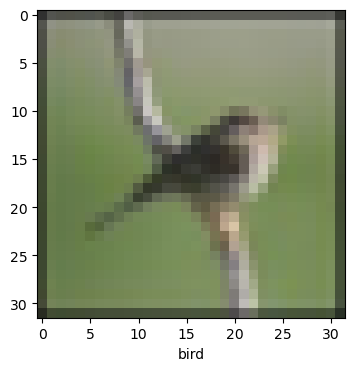

In [100]:
plot_photos(X_test,y_test,3333)

In [101]:
y_pred =  cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [102]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [109]:
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1000
           1       0.89      0.79      0.83      1000
           2       0.58      0.67      0.62      1000
           3       0.55      0.58      0.57      1000
           4       0.72      0.66      0.69      1000
           5       0.64      0.67      0.66      1000
           6       0.78      0.80      0.79      1000
           7       0.85      0.70      0.77      1000
           8       0.79      0.85      0.82      1000
           9       0.77      0.83      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

